## Imports

In [1]:
%load_ext autoreload
%autoreload 2
from typing import Any
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import os

from utils.plotter import Plotter
from utils.data_handler import DataHandler
from utils import get_diagnostics, get_rmses

output_folder = "first_output"
his_file = "gtsm_fine_0000_his.nc"
locs_file = "selected_output.xyn"

## Bathymetry? z-axis in network

In [4]:
nc = xr.load_dataset("step11_global_net.nc")

<Figure size 640x480 with 0 Axes>

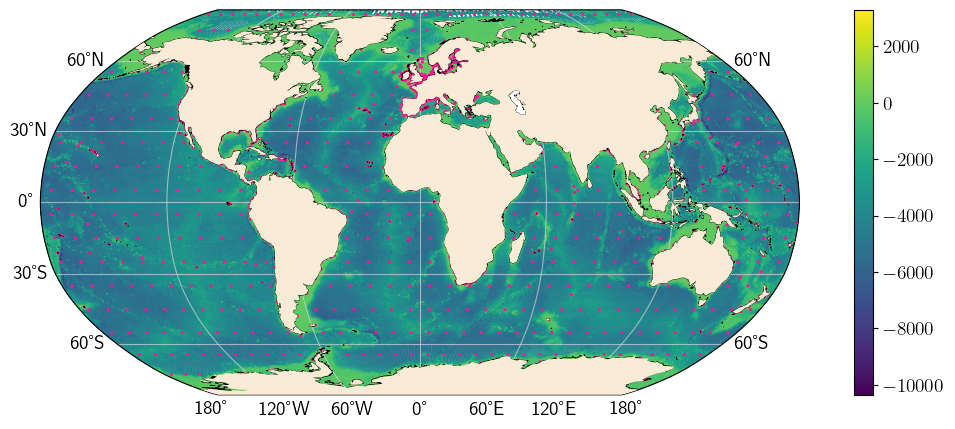

In [6]:
x = nc.NetNode_x
y = nc.NetNode_y
z = nc.NetNode_z

# Read locations
df = pd.read_csv(
    locs_file, delim_whitespace=True, header=None, names=["lon", "lat", "name"]
)
stations = df[["lon", "lat"]].to_numpy()

_, _ = Plotter.plot_map(
    x,
    y,
    z,
    path="bathymetry.png",
    size_lims=(0.01, 3),
    stations=stations,
)

# _, _ = Plotter.plot_map(
#     x,
#     y,
#     np.zeros_like(x),
#     path="stations.png",
#     size_lims=(0.01, 3),
#     # stations=stations,
# )
plt.show()

## All stations satisfy the initial conditions

In [7]:
his = xr.open_dataset(os.path.join(output_folder, his_file))
his

<xarray.Dataset>
Dimensions:                                  (stations: 1451,
                                              station_geom_nNodes: 1451,
                                              time: 241)
Coordinates:
    station_x_coordinate                     (stations) float64 ...
    station_y_coordinate                     (stations) float64 ...
    station_name                             (stations) |S256 ...
  * time                                     (time) datetime64[ns] 2006-12-25...
Dimensions without coordinates: stations, station_geom_nNodes
Data variables: (12/54)
    wgs84                                    int32 ...
    station_id                               (stations) |S256 ...
    station_geom                             int32 ...
    station_geom_node_count                  (stations) int32 ...
    station_geom_node_coordx                 (station_geom_nNodes) float64 ...
    station_geom_node_coordy                 (station_geom_nNodes) float64 ...
    ...                                       ...
    water_balance_Qext_out_2D                (time) float64 ...
    water_balance_Qext_total_2D              (time) float64 ...
    water_balance_total_volume_interception  (time) float64 ...
    water_balance_evaporation_interception   (time) float64 ...
    water_balance_precipitation_on_ground    (time) float64 ...
    timestep                                 (time) float64 ...
Attributes:
    institution:               Deltares
    references:                http://www.deltares.nl
    source:                    Deltares, D-Flow FM Version 1.2.177.142431, Ja...
    history:                   Created on 2023-08-03T16:21:22+0200, D-Flow FM
    date_created:              2023-08-03T16:21:22+0200
    date_modified:             2023-08-03T16:21:22+0200
    Conventions:               CF-1.5 Deltares-0.1 ACDD-1.3
    uuid:                      155884f2-1bae-427d-89b7-4840721a78d8
    time_coverage_start:       2006-12-25T**:00:00+00:00
    time_coverage_end:         2006-12-26T04:00:00+00:00
    time_coverage_duration:    P0000-00-01T16:00:00
    time_coverage_resolution:  P0000-00-00T00:10:00

shape: (241, 1451)
n_cols with any nans: 1, idxs: [896]
n_cols with all nans: 1, idxs: [896]


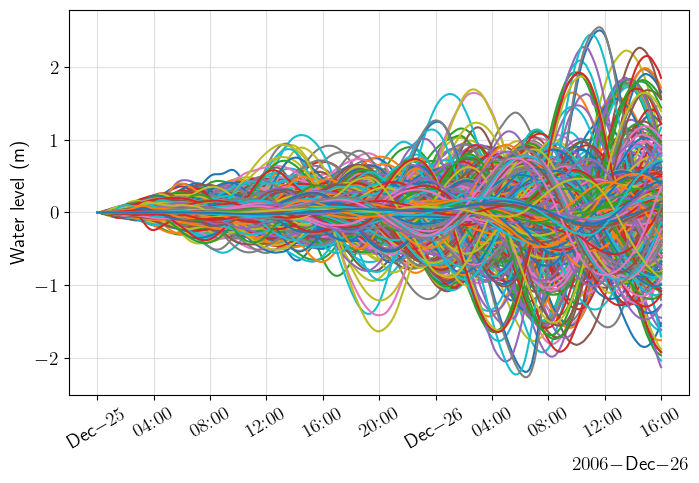

In [8]:
ts = his.time
lev = his.waterlevel
get_diagnostics(lev)
labels = his.station_name.to_numpy().squeeze()

Plotter.mplot(
    ts,
    lev,
    xlabel="",
    ylabel="Water level (m)",
    clear=False,
    path="init_all_stations.pdf",
    is_ax_date=True,
)
plt.show()

## Waterlevel at some station

<Figure size 640x480 with 0 Axes>

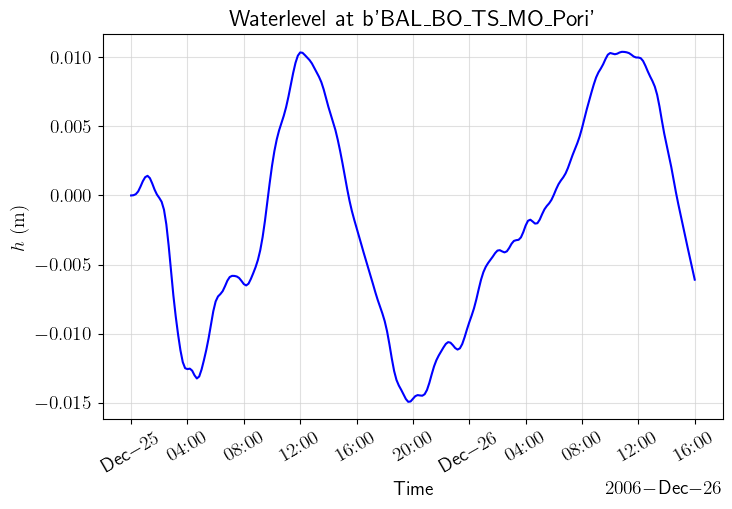

In [9]:
n_indices = 1
indices = np.random.randint(0, lev.shape[1] + 1, n_indices)
loc_names = list(map(lambda i: labels[i].strip(), indices))

waterlevels = lev[:, indices].to_numpy()
title_func = lambda s: f"Waterlevel at {s}"

Plotter.plot_series_locs(ts, waterlevels, loc_names, title_func, save=False)

## Plot results globally (join domains)

In [10]:
map_file = os.path.join(output_folder, "gtsm_fine_0019_map.nc")
xr.load_dataset(map_file)

<xarray.Dataset>
Dimensions:                     (nmesh2d_EnclosurePoints: 6163,
                                 nmesh2d_EnclosureInstance: 1,
                                 nmesh2d_EnclosureParts: 56, nNetNode: 89476,
                                 nNetLink: 189166, nNetLinkPts: 2,
                                 nNetElem: 99622, nNetElemMaxNode: 4,
                                 nNetLinkContourPts: 4, nBndLink: 6502,
                                 nFlowElem: 99622, nFlowElemContourPts: 4,
                                 nFlowLink: 182664, nFlowLinkPts: 2, time: 41)
Coordinates:
    NetNode_x                   (nNetNode) float64 -30.0 -60.0 ... -31.52 -35.27
    NetNode_y                   (nNetNode) float64 30.0 60.0 ... 52.15 53.79
    FlowElem_xcc                (nFlowElem) float64 -71.22 -71.16 ... -62.67
    FlowElem_ycc                (nFlowElem) float64 46.79 46.79 ... 57.92 57.98
  * time                        (time) datetime64[ns] 2006-12-25 ... 2006-12-...
Dimensions without coordinates: nmesh2d_EnclosurePoints,
                                nmesh2d_EnclosureInstance,
                                nmesh2d_EnclosureParts, nNetNode, nNetLink,
                                nNetLinkPts, nNetElem, nNetElemMaxNode,
                                nNetLinkContourPts, nBndLink, nFlowElem,
                                nFlowElemContourPts, nFlowLink, nFlowLinkPts
Data variables: (12/40)
    mesh2d_enc_x                (nmesh2d_EnclosurePoints) float64 -71.25 ... ...
    mesh2d_enc_y                (nmesh2d_EnclosurePoints) float64 46.76 ... 2...
    mesh2d_enc_node_count       (nmesh2d_EnclosureInstance) int32 6163
    mesh2d_enc_part_node_count  (nmesh2d_EnclosureParts) int32 5336 39 ... 41 25
    mesh2d_enc_interior_ring    (nmesh2d_EnclosureParts) int32 0 0 1 1 ... 1 0 0
    mesh2d_enclosure_container  float32 9.969e+36
    ...                          ...
    s1                          (time, nFlowElem) float64 0.0 0.0 ... 1.759
    waterdepth                  (time, nFlowElem) float64 4.602 4.602 ... 0.0
    TidalPotential_without_SAL  (time, nFlowElem) float64 -0.8517 ... -1.116
    SALPotential                (time, nFlowElem) float64 0.0 0.0 ... 0.1553
    ucx                         (time, nFlowElem) float64 0.0 0.0 ... 0.0 0.0
    ucy                         (time, nFlowElem) float64 0.0 0.0 ... 0.0 0.0
Attributes:
    institution:    Deltares
    references:     http://www.deltares.nl
    source:         Deltares, D-Flow FM Version 1.2.177.142431, Jan 26 2023, ...
    history:        Created on 2023-08-03T16:21:22+0200, D-Flow FM
    date_created:   2023-08-03T16:21:22+0200
    date_modified:  2023-08-03T16:21:22+0200
    Conventions:    UGRID-0.9
    uuid:           ba0dafc9-59ea-4e71-97bc-32517a9f1c3c

<Figure size 640x480 with 0 Axes>

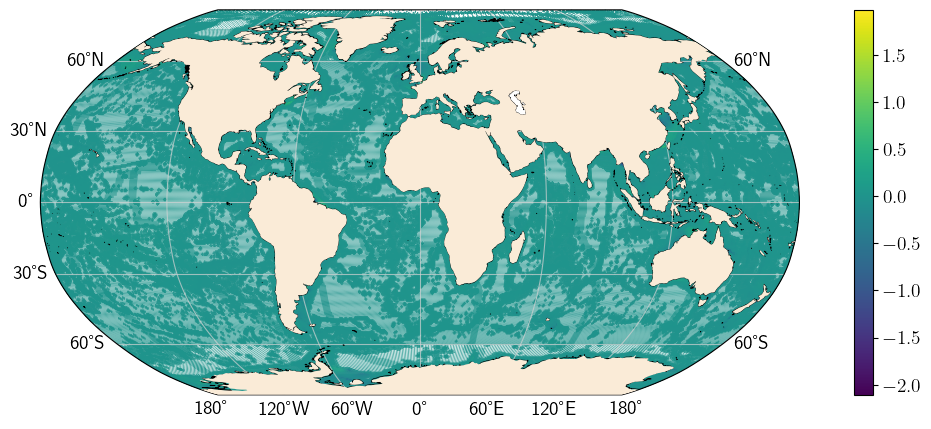

In [18]:
t = 40

vars = ["s1"]
# vars = ["s1", "waterdepth", "TidalPotential_without_SAL", "SALPotential", "ucx", "ucy"]
for var in vars:
    x = np.array([])
    y = np.array([])
    z = np.array([])
    z_dom = np.array([])
    for i in range(20):
        map_file = os.path.join(output_folder, f"gtsm_fine_00{i:02}_map.nc")
        nc = xr.load_dataset(map_file)
        x = np.hstack((x, nc.FlowElem_xcc))
        y = np.hstack((y, nc.FlowElem_ycc))

        z_vals = getattr(nc, var)[t, :]
        z = np.hstack((z, z_vals))
        kwargs: dict[str, Any] = {}
        if var == "s1":
            kwargs = {"vmin": -1.5, "vmax": 1.5}
        # extend = None
        # if var == "s1":
        #     z_vals = np.minimum(z_vals, 2.5)
        #     extend = "max"
        z_dom = np.hstack((z_dom, i * np.ones_like(z_vals)))

    Plotter.plot_map(x, y, z, size=0.5, path=f"{var}_t{t}.png", **kwargs)
plt.show()
# Plotter.plot_map(
#     x,
#     y,
#     z_dom,
#     size=0.5,
#     path="domains.png",
#     cmap="tab20",
#     draw_colorbar=False,
# )
# plt.show()

## Compare results in a domain at different times

<Figure size 640x480 with 0 Axes>

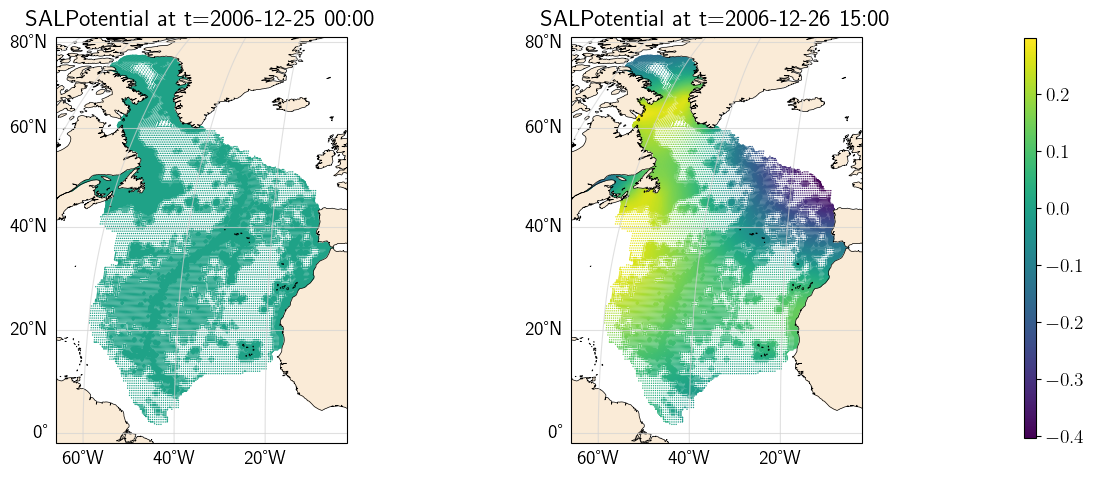

In [12]:
dom = 19
times = [0, 39]
x = []
y = []
z = []
titles = []
var = "SALPotential"
time_format = "%Y-%m-%d %H:%M"

for i, t in enumerate(times):
    map_file = os.path.join(output_folder, f"gtsm_fine_00{dom:02}_map.nc")
    nc = xr.load_dataset(map_file)
    x.append(nc.FlowElem_xcc)
    y.append(nc.FlowElem_ycc)
    z.append(nc.SALPotential[t, :])
    date_time = pd.to_datetime(str(nc.time.values[t]))
    t_label = date_time.strftime(time_format)
    titles.append(f"{var} at t={t_label}")

x = np.array(x)
y = np.array(y)
z = np.array(z)
fig, _ = Plotter.compare_map(
    x,
    y,
    z,
    titles=titles,
    size=1,
    path=f"{var}_dom{dom}.png",
)

## Check that model is independent of initial conditions

<Figure size 640x480 with 0 Axes>

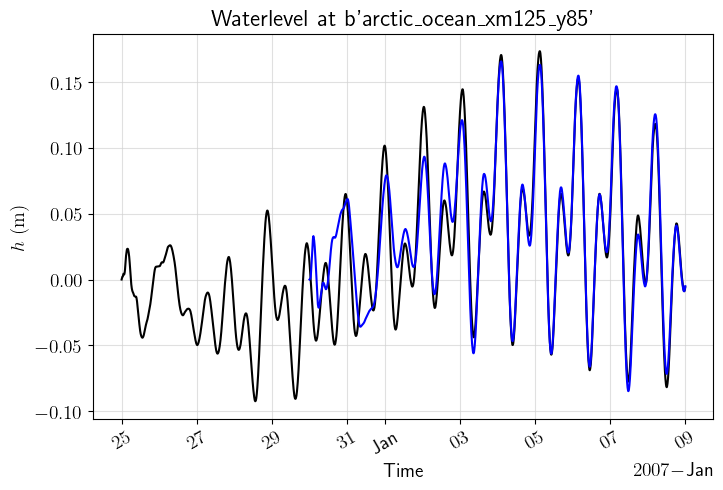

In [13]:
full_folder = "output_full"
clipped_folder = "output_clipped"
identifier = "spin_up"

data_folders = [full_folder, clipped_folder]

ts_list = []
series_list = []
labels = []
n_stations = 0
for folder in data_folders:
    his = xr.open_dataset(os.path.join(folder, his_file))

    ts = his.time.to_numpy()
    lev = his.waterlevel.to_numpy()
    labels = his.station_name.to_numpy().squeeze()

    ts_list.append(ts)
    series_list.append(lev)
    n_stations = lev.shape[1]

n_indices = 1
# indices = np.atleast_1d(np.random.randint(0, n_stations + 1, n_indices))
indices = [634, 436, 346, 10]  # Panama, nice example
loc_names = list(map(lambda i: labels[i].strip(), indices))

title_func = lambda s: f"Waterlevel at {s}"
for ii, i in enumerate(indices):
    data_list = []
    for j, folder in enumerate(data_folders):
        waterlevels = series_list[j][:, i]
        data_list.append(waterlevels)

    Plotter.plot_series(
        ts_list, data_list, loc_names[ii], title_func, identifier=identifier, save=True
    )
    plt.show()

## Spin-up time / accuracy estimation

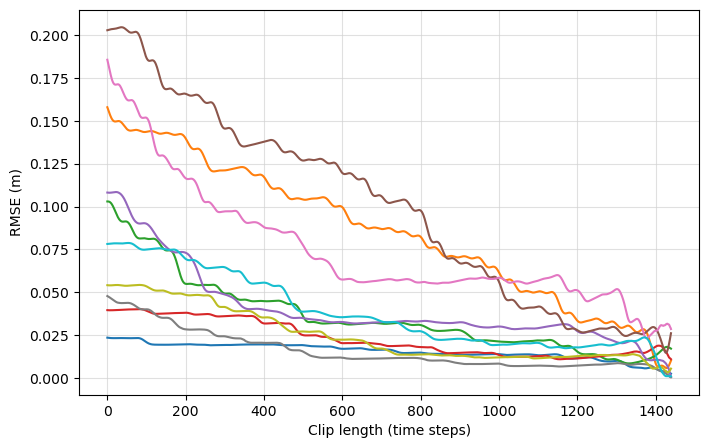

In [2]:
full_folder = "output_full"
clipped_folder = "output_clipped"
data_folders = [full_folder, clipped_folder]

ts_list = []
series_list = []
labels = []
n_stations = 0
for folder in data_folders:
    his = xr.open_dataset(os.path.join(folder, his_file))

    ts = his.time.to_numpy()
    lev = his.waterlevel.to_numpy()
    labels = his.station_name.to_numpy().squeeze()

    ts_list.append(ts)
    series_list.append(lev)
    n_stations = lev.shape[1]

n_indices = 10
indices = np.atleast_1d(np.random.randint(0, n_stations, n_indices))
station_labels = labels[indices]

rmses_per_station = []
for ii, i in enumerate(indices):
    data_list = []
    for j, folder in enumerate(data_folders):
        waterlevels = series_list[j][:, i]
        data_list.append(waterlevels)

    rmses_per_station.append(get_rmses(data_list[0], ts_list[1], data_list[1]))

rmses_per_station = np.vstack(rmses_per_station).T

# clip: number of samples excluded from RMSE calculation
clip_lengths = np.arange(rmses_per_station.shape[0])

Plotter.mplot(
    clip_lengths,
    rmses_per_station,
    labels=station_labels,
    xlabel="Clip length (time steps)",
    ylabel="RMSE (m)",
    clear=False,
    path="rmse_window.pdf",
)
plt.show()

In [3]:
full_folder = "output_full"
clipped_folder = "output_clipped"
data_folders = [full_folder, clipped_folder]

ts_list = []
series_list = []
labels = []
n_stations = 0
for folder in data_folders:
    print(folder)
    his = xr.open_dataset(os.path.join(folder, his_file))

    ts = his.time.to_numpy()
    lev = his.waterlevel.to_numpy()
    labels = his.station_name.to_numpy().squeeze()
    get_diagnostics(lev)

    ts_list.append(ts)
    series_list.append(lev)
    n_stations = lev.shape[1]

output_full
shape: (2161, 1451)
n_cols with any nans: 1, idxs: [896]
n_cols with all nans: 1, idxs: [896]
output_clipped
shape: (1441, 1451)
n_cols with any nans: 17, idxs: [  0   1   2   5   6   7   8   9  33  34  35  36  37  38  39 677 896]
n_cols with all nans: 17, idxs: [  0   1   2   5   6   7   8   9  33  34  35  36  37  38  39 677 896]


In [4]:
indices = np.arange(n_stations)

list_arr = []
for ii, i in enumerate(indices):
    data_list = []
    for j, folder in enumerate(data_folders):
        waterlevels = series_list[j][:, i]
        data_list.append(waterlevels)

    list_arr.append(get_rmses(data_list[0], ts_list[1], data_list[1]))

rmses_per_station = np.vstack(list_arr).T
mask = get_diagnostics(rmses_per_station)
rmses_per_station = rmses_per_station[:, mask]

shape: (1440, 1451)
n_cols with any nans: 17, idxs: [  0   1   2   5   6   7   8   9  33  34  35  36  37  38  39 677 896]
n_cols with all nans: 17, idxs: [  0   1   2   5   6   7   8   9  33  34  35  36  37  38  39 677 896]


<Figure size 640x480 with 0 Axes>

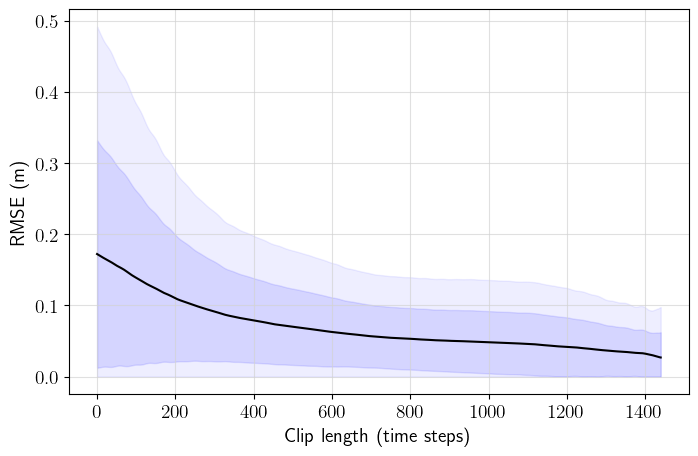

In [5]:
# clip: number of samples excluded from RMSE calculation
clip_lengths = np.arange(rmses_per_station.shape[0])

y = rmses_per_station.mean(axis=1)
s = rmses_per_station.std(axis=1, ddof=1)
Plotter.plot_bands(
    clip_lengths,
    y,
    s,
    xlabel="Clip length (time steps)",
    ylabel="RMSE (m)",
    path="accuracy_window.pdf",
    clear=True,
    n_bands=2,
    ensure_positive=True,
)
plt.show()

## Clip data with spin-up time

In [6]:
spin_up_steps = clip_lengths[y < 0.05][0]
spin_up_steps

923

In [19]:
np.timedelta64(ts[914] - ts[0], "m")

numpy.timedelta64(9140,'m')

In [20]:
spin_up_steps = 914
his_clipped = DataHandler.clip_dataset(spin_up_steps, his)
his_clipped

<xarray.Dataset>
Dimensions:                                  (stations: 1451,
                                              station_geom_nNodes: 1451,
                                              time: 527)
Coordinates:
    station_x_coordinate                     (stations) float64 ...
    station_y_coordinate                     (stations) float64 ...
    station_name                             (stations) |S256 b'arctic_ocean_...
  * time                                     (time) datetime64[ns] 2007-01-05...
Dimensions without coordinates: stations, station_geom_nNodes
Data variables: (12/54)
    wgs84                                    int32 ...
    station_id                               (stations) |S256 ...
    station_geom                             int32 ...
    station_geom_node_count                  (stations) int32 ...
    station_geom_node_coordx                 (station_geom_nNodes) float64 ...
    station_geom_node_coordy                 (station_geom_nNodes) float64 ...
    ...                                       ...
    water_balance_Qext_out_2D                (time) float64 ...
    water_balance_Qext_total_2D              (time) float64 ...
    water_balance_total_volume_interception  (time) float64 ...
    water_balance_evaporation_interception   (time) float64 ...
    water_balance_precipitation_on_ground    (time) float64 ...
    timestep                                 (time) float64 ...
Attributes:
    institution:               Deltares
    references:                http://www.deltares.nl
    source:                    Deltares, D-Flow FM Version 1.2.177.142431, Ja...
    history:                   Created on 2023-08-04T13:51:11+0200, D-Flow FM
    date_created:              2023-08-04T13:51:11+0200
    date_modified:             2023-08-04T13:51:11+0200
    Conventions:               CF-1.5 Deltares-0.1 ACDD-1.3
    uuid:                      84f2ca18-238f-4da1-9226-d5c02d8f499b
    time_coverage_start:       2006-12-30T**:00:00+00:00
    time_coverage_end:         2007-01-09T**:00:00+00:00
    time_coverage_duration:    P0000-00-10T00:00:00
    time_coverage_resolution:  P0000-00-00T00:10:00

<Figure size 640x480 with 0 Axes>

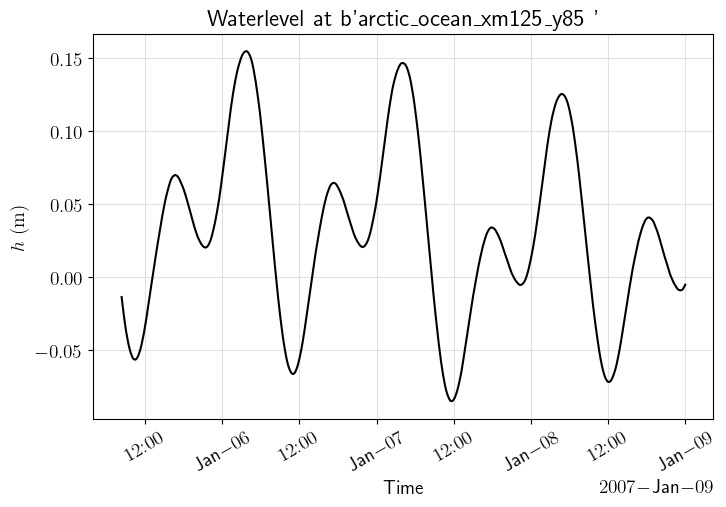

In [21]:
i = 10
ts = his_clipped.time
values = his_clipped.waterlevel.isel(stations=i)
Plotter.plot_series(
    [ts],
    [values],
    loc_name=labels[i],
    title_func=lambda x: f"Waterlevel at {x}",
    save=False,
)
plt.show()

(-0.1, 0.1)

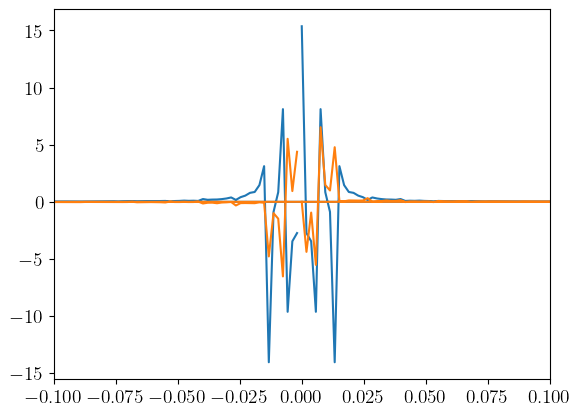

In [22]:
freq = np.fft.fftfreq(ts.shape[-1])
sp = np.fft.fft(values)
plt.plot(freq, sp.real, freq, sp.imag)
plt.xlim((-0.1, 0.1))

## Stability of initial conditions

In [23]:
full_folder = "output_full"
clipped_folder = "output_clipped"
data_folders = [full_folder, clipped_folder]

ts_list = []
series_list = []
labels = []
n_stations = 0
for folder in data_folders:
    print(folder)
    his = xr.open_dataset(os.path.join(folder, his_file))

    ts = his.time.to_numpy()
    lev = his.waterlevel.to_numpy()
    labels = his.station_name.to_numpy().squeeze()
    get_diagnostics(lev)

    ts_list.append(ts)
    series_list.append(lev)
    n_stations = lev.shape[1]

output_full
shape: (2161, 1451)
n_cols with any nans: 1, idxs: [896]
n_cols with all nans: 1, idxs: [896]
output_clipped
shape: (1441, 1451)
n_cols with any nans: 17, idxs: [  0   1   2   5   6   7   8   9  33  34  35  36  37  38  39 677 896]
n_cols with all nans: 17, idxs: [  0   1   2   5   6   7   8   9  33  34  35  36  37  38  39 677 896]


shape: (1441, 1451)
n_cols with any nans: 17, idxs: [  0   1   2   5   6   7   8   9  33  34  35  36  37  38  39 677 896]
n_cols with all nans: 17, idxs: [  0   1   2   5   6   7   8   9  33  34  35  36  37  38  39 677 896]


<Figure size 640x480 with 0 Axes>

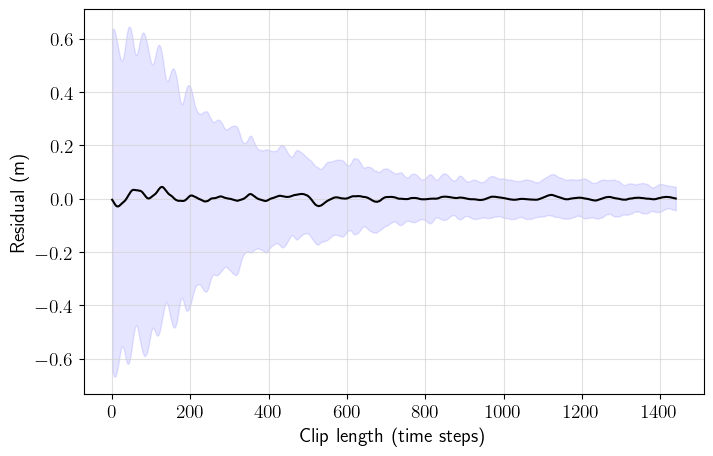

In [24]:
indices = np.arange(n_stations)

residuals_per_station = []
for ii, i in enumerate(indices):
    data_list = []
    for j, folder in enumerate(data_folders):
        waterlevels = series_list[j][:, i]
        data_list.append(waterlevels)

    len_clip = ts_list[1].shape[0]
    clipped_data_full = data_list[0][-len_clip:]
    residuals_per_station.append(clipped_data_full - data_list[1])

residuals_per_station = np.vstack(residuals_per_station).T
mask = get_diagnostics(residuals_per_station)
residuals_per_station = residuals_per_station[:, mask]

clip_lengths = np.arange(residuals_per_station.shape[0])

y = residuals_per_station.mean(axis=1)
s = residuals_per_station.std(axis=1, ddof=1)
Plotter.plot_bands(
    clip_lengths,
    y,
    s,
    xlabel="Clip length (time steps)",
    ylabel="Residual (m)",
    path="residuals_window.pdf",
    clear=True,
    ensure_positive=False,
)
plt.show()